# Contributions:
## Mohamed Ali Ahmed Bakr    1801534
## Mohamed Ahmed Mohamed Othman    1803743

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data and Split to Train and Test

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data.head()

location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
#REF!                                                                     
0           104        8       1  66.0          1           0        14   
1           101        8       0  56.0          0           1        14   
2           137        8       1  46.0          0           1        14   
3           116        8       0  60.0          1           0        14   
4           116        8       1  58.0          0           0        14   

       symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
#REF!                                                                          
0            31        19        12         3         1             8       1  
1            31        19        12         3         1             0       0  
2            31        19        12         3         1            13       0  
3            31        19        12         3         1             0       0  
4            31        19        12         3         1             0       0

In [3]:
#We will ignore Symptom6 feature cause all samples is 1 and only one sample is 0 
#And there are 2 samples that have noise at 'diff_sym_hos' feature as this feature for number of days and values was negative values so we cleaned it.
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['result']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(688, 13)
(173, 13)
(688,)
(173,)


# Tuning HyperParamert For KNN Model

In [5]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='recall')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.6821428571428572, 0.5696428571428571, 0.6696428571428571, 0.5053571428571428, 0.6214285714285714, 0.48392857142857143, 0.5714285714285714, 0.46964285714285714, 0.5446428571428571, 0.4446428571428571, 0.4821428571428571, 0.4446428571428571, 0.4821428571428571, 0.4196428571428571, 0.4821428571428571, 0.4196428571428571, 0.4446428571428571, 0.40714285714285714, 0.4196428571428571, 0.3821428571428571, 0.4321428571428571, 0.39464285714285713, 0.4196428571428571, 0.3821428571428571, 0.40714285714285714, 0.3696428571428571, 0.39464285714285713, 0.3696428571428571, 0.3821428571428571, 0.3821428571428571]


In [6]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.6821428571428572


Text(0, 0.5, 'Cross-validated score')

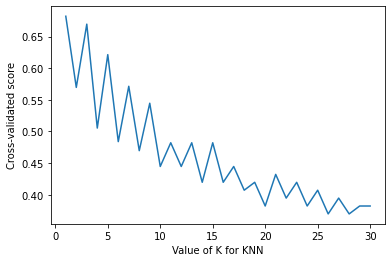

In [7]:
#plot different values for k VS. Score
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated score')
#we will take k=3 not k=1 TO avoid overfitting 

# Tuning HyperParameters for Logistic Regression

In [8]:
logmodel = LogisticRegression() 
#Tuning Hyperparameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [ 10.0,1.0,0.1, 0.01]
# define grid search
grid_parametrs = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
LogReg_Model = GridSearchCV(estimator=logmodel, param_grid=grid_parametrs, n_jobs=-1,scoring='recall',error_score=0)

# Tuning Hyperparameters for SVM

In [9]:
SVM_Model = SVC(probability=True)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
SVM_model = GridSearchCV(estimator=SVM_Model,param_grid= param_grid,scoring = 'recall', refit = True, verbose = 3)

# Tuning Hyperparameters for Decision Tree

In [10]:
# Maximum Depth

Depth_range = range(1, 15)
# empty list to store scores
Depth_scores = []

# 1. we will loop through reasonable values of Depth
for D in Depth_range:
    # 2. run DecisionTreeClassifier with max depths
    Dtc= DecisionTreeClassifier(criterion = "entropy", random_state=42, max_depth=D)
    # 3. obtain cross_val_score for DecisionTreeClassifier with D Depths
    scores = cross_val_score(Dtc, X_train, Y_train, cv=10, scoring='recall')
    # 4. append mean of scores for Max depths to Depth_scores list
    Depth_scores.append(scores.mean())

print(Depth_scores)
print('Max of list', max(Depth_scores))

[0.3196428571428571, 0.7339285714285715, 0.6696428571428571, 0.6946428571428571, 0.7571428571428571, 0.7964285714285715, 0.8357142857142857, 0.8482142857142858, 0.8607142857142858, 0.8607142857142858, 0.8607142857142858, 0.8607142857142858, 0.8607142857142858, 0.8607142857142858]
Max of list 0.8607142857142858


In [11]:
# Min Samples Leaf
leafs_range = range(1, 20)

leafs_scores = []

for L in leafs_range:
    
    Dtc= DecisionTreeClassifier(criterion = "entropy", random_state=42, max_depth=9, min_samples_leaf=L)
    scores = cross_val_score(Dtc, X_train, Y_train, cv=10, scoring='recall')
    leafs_scores.append(scores.mean())

print(leafs_scores)
print('Max of list', max(leafs_scores))

[0.8607142857142858, 0.7714285714285715, 0.8214285714285715, 0.7964285714285715, 0.85, 0.8375, 0.7482142857142857, 0.7214285714285714, 0.7589285714285714, 0.6714285714285715, 0.6714285714285715, 0.6089285714285715, 0.6321428571428571, 0.6053571428571429, 0.5178571428571429, 0.5178571428571429, 0.5053571428571428, 0.46785714285714286, 0.4928571428571429]
Max of list 0.8607142857142858


From the Previous: the best max_depth is 9 and min_samples_leaf is 5

# NO Hyperparametrs Needed to tune for Naive Bayes

# Training Models

In [12]:
#Now we found best k=3 for knn model from CV .
knn_Model = KNeighborsClassifier(n_neighbors=3)
knn_Model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
#For LOgistic Regression Train Model
import warnings
warnings.filterwarnings('ignore')
LogReg_Model.fit(X_train,Y_train)
print("Best:", LogReg_Model.best_params_)

Best: {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [14]:
# Gaussian Naive-Bayes with no calibration
NB_Model = GaussianNB()
NB_Model.fit(X_train, Y_train)  

GaussianNB()

In [15]:
#For SVM Train Model
SVM_model.fit(X_train,Y_train)
#print("Best:", SVM_model.best_params_)
print(SVM_model.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   1.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.688 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.800 total time=   1.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.938 total time=   0.9s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.312 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.400 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.750 total time=   0.8s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=1.000 total time=   0.9s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.688 total time=   0.5s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.800 total time=   1.6s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.938 total time=   1.1s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0

[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.562 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.438 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.438 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.625 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.750 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.467 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.125 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.375 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.188 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.188 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.133 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.312 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.750 total time=   1.1s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   1.3s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.688 total time=   0.5s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.800 total time=   1.6s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.938 total time=   1.0s
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 3/5] END .C=1000, gamma=

In [16]:
# Decision Tree Classifier
# using entropy because it is better for numerical data
Dtc= DecisionTreeClassifier(criterion = "entropy", random_state=42, max_depth=9, min_samples_leaf=1)

Dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

# Predict Propapilites

In [17]:
# predict probabilities for KNN
y_pred_propa_knn = knn_Model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_proba_knn = y_pred_propa_knn[:, 1]

In [18]:
# predict probabilities for LOGREG
y_pred_propa_LR = LogReg_Model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_proba_LR = y_pred_propa_LR[:, 1]

In [19]:
# predict probabilities For Naive Bayes
y_pred_propa_NB = NB_Model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_proba_NB = y_pred_propa_NB[:, 1]

In [20]:
# predict probabilities For SVM
y_pred_propa_SVM = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_proba_SVM = y_pred_propa_SVM[:, 1]

In [21]:
# predict probabilities For Decision Tree
y_pred_propa_Dtc = Dtc.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_proba_Dtc = y_pred_propa_Dtc[:, 1]

# Predict Classes

## KNN Class

In [22]:
# predict class values for KNN
yhat_KNN = knn_Model.predict(X_test)
knn_precision, knn_recall, knn_thresholds  = metrics.precision_recall_curve(Y_test, y_pred_proba_knn)
knn_f1, knn_auc = metrics.f1_score(Y_test, yhat_KNN), metrics.auc(knn_recall, knn_precision)
knn_confusion_matrix = metrics.confusion_matrix(Y_test, yhat_KNN)
# convert to f score
knn_fscore = (2 * knn_precision * knn_recall) / (knn_precision + knn_recall)
# locate the index of the largest f score
knn_ix = np.argmax(knn_fscore)
print('Best Threshold=%f, F-Score=%.3f' % (knn_thresholds[knn_ix], knn_fscore[knn_ix]))

Best Threshold=0.333333, F-Score=0.774


## Logistic Regression Class

In [23]:
# predict class values for LOGREG
yhat_LR = LogReg_Model.predict(X_test)
lr_precision, lr_recall, lr_thresholds = metrics.precision_recall_curve(Y_test, y_pred_proba_LR)
lr_f1, lr_auc = metrics.f1_score(Y_test, yhat_LR), metrics.auc(lr_recall, lr_precision)
LR_confusion_matrix = metrics.confusion_matrix(Y_test, yhat_LR)
# convert to f score
LR_fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# locate the index of the largest f score
LR_ix = np.argmax(LR_fscore)
print('Best Threshold=%f, F-Score=%.3f' % (lr_thresholds[LR_ix], LR_fscore[LR_ix]))

Best Threshold=0.221772, F-Score=0.903


## Naive Bayes Class

In [24]:
# predict class values for Naive Bayes
yhat_NB = NB_Model.predict(X_test)
NB_precision, NB_recall, NB_thresholds = metrics.precision_recall_curve(Y_test, y_pred_proba_NB)
NB_f1, NB_auc = metrics.f1_score(Y_test, yhat_NB), metrics.auc(NB_recall, NB_precision)
NB_confusion_matrix = metrics.confusion_matrix(Y_test, yhat_NB)
# convert to f score
NB_fscore = (2 * NB_precision * NB_recall) / (NB_precision + NB_recall)
# locate the index of the largest f score
NB_ix = np.argmax(NB_fscore)
print('Best Threshold=%f, F-Score=%.3f' % (NB_thresholds[NB_ix], NB_fscore[NB_ix]))

Best Threshold=0.999155, F-Score=0.776


## SVM Class

In [25]:
# predict class values for SVM
yhat_SVM = SVM_model.predict(X_test)
svm_precision, svm_recall, svm_thresholds = metrics.precision_recall_curve(Y_test, y_pred_proba_SVM)
svm_f1, svm_auc = metrics.f1_score(Y_test, yhat_SVM), metrics.auc(svm_recall, svm_precision)
SVM_confusion_matrix = metrics.confusion_matrix(Y_test, yhat_SVM)
# convert to f score
SVM_fscore = (2 * svm_precision * svm_recall) / (svm_precision + svm_recall)
# locate the index of the largest f score
SVM_ix = np.argmax(SVM_fscore)
print('Best Threshold=%f, F-Score=%.3f' % (svm_thresholds[SVM_ix], SVM_fscore[SVM_ix]))

Best Threshold=0.343581, F-Score=0.912


# Decision Tree Classes

In [26]:
yhat_Dtc = Dtc.predict(X_test)
Dtc_precision, Dtc_recall, Dtc_thresholds = metrics.precision_recall_curve(Y_test, y_pred_proba_Dtc)
Dtc_f1, Dtc_auc = metrics.f1_score(Y_test, yhat_Dtc), metrics.auc(Dtc_recall, Dtc_precision)
Dtc_confusion_matrix = metrics.confusion_matrix(Y_test, yhat_Dtc)
# convert to f score
Dtc_fscore = (2 * Dtc_precision * Dtc_recall) / (Dtc_precision + Dtc_recall)
# locate the index of the largest f score
Dtc_ix = np.argmax(Dtc_fscore)
print('Best Threshold=%f, F-Score=%.3f' % (Dtc_thresholds[Dtc_ix], Dtc_fscore[Dtc_ix]))

Best Threshold=1.000000, F-Score=0.929


## Calculate Scores

In [27]:
# summarize scores for knn
print('KNN: Recall=%.3f precision=%.3f' % (knn_recall[knn_ix], knn_precision[knn_ix]))
# summarize scores for logreg
print('Logistic: Recall=%.3f precision=%.3f' % (lr_recall[LR_ix], lr_precision[LR_ix]))
# summarize scores for Naive Bayes
print('Naive Bayes: Recall=%.3f precision=%.3f' % (NB_recall[NB_ix], NB_precision[NB_ix]))
# summarize scores for svm
print('SVM: Recall=%.3f precision=%.3f' % (svm_recall[SVM_ix], svm_precision[SVM_ix]))
# summarize scores for Decision Tree
print('Decision Tree: Recall=%.3f precision=%.3f' % (Dtc_recall[Dtc_ix], Dtc_precision[Dtc_ix]))

KNN: Recall=0.828 precision=0.727
Logistic: Recall=0.966 precision=0.848
Naive Bayes: Recall=0.897 precision=0.684
SVM: Recall=0.897 precision=0.929
Decision Tree: Recall=0.897 precision=0.963


In [28]:
# summarize scores for knn
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
# summarize scores for logreg
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# summarize scores for Naive Bayes
print('Naive Bayes: f1=%.3f auc=%.3f' % (NB_f1, NB_auc))
# summarize scores for svm
print('Logistic: f1=%.3f auc=%.3f' % (svm_f1, svm_auc))
# summarize scores for Decision Tree
print('Decision Tree: f1=%.3f auc=%.3f' % (Dtc_f1, Dtc_auc))

KNN: f1=0.694 auc=0.833
Logistic: f1=0.739 auc=0.951
Naive Bayes: f1=0.345 auc=0.721
Logistic: f1=0.863 auc=0.974
Decision Tree: f1=0.929 auc=0.938


In [29]:
print("Knn_confusionmatrix")
print(knn_confusion_matrix)
print("LR_confusionmatrix")
print(LR_confusion_matrix) 
print("NB_confusionmatrix")
print(NB_confusion_matrix)
print("SVM_confusionmatrix")
print(SVM_confusion_matrix) 
print("Dtc_confusionmatrix")
print(Dtc_confusion_matrix) 

Knn_confusionmatrix
[[141   3]
 [ 12  17]]
LR_confusionmatrix
[[144   0]
 [ 12  17]]
NB_confusionmatrix
[[ 34 110]
 [  0  29]]
SVM_confusionmatrix
[[144   0]
 [  7  22]]
Dtc_confusionmatrix
[[143   1]
 [  3  26]]


# Plot Recall Precision Curve

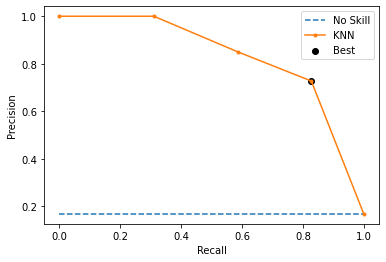

In [30]:
# plot the precision-recall curves for KNN
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
plt.scatter(knn_recall[knn_ix], knn_precision[knn_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

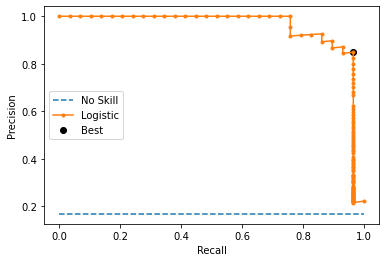

In [31]:
# plot the precision-recall curves for logisticREG
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.scatter(lr_recall[LR_ix], lr_precision[LR_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

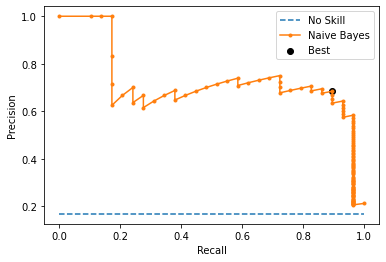

In [32]:
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(NB_recall, NB_precision, marker='.', label='Naive Bayes')
plt.scatter(NB_recall[NB_ix], NB_precision[NB_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

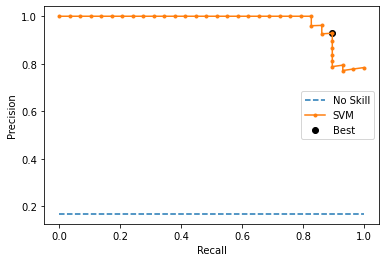

In [33]:
# plot the precision-recall curves for SVM
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
plt.scatter(svm_recall[SVM_ix], svm_precision[SVM_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

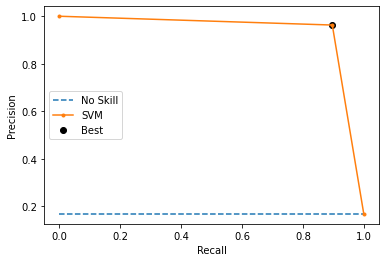

In [34]:
# plot the precision-recall curves for Decision Tree
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(Dtc_recall, Dtc_precision, marker='.', label='SVM')
plt.scatter(Dtc_recall[Dtc_ix], Dtc_precision[Dtc_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Plot ROC Curve

## Create no skill Classifier

In [35]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = metrics.roc_auc_score(Y_test, ns_probs)
ns_fpr, ns_tpr, _ = metrics.roc_curve(Y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))

No Skill: ROC AUC=0.500


## For KNN Model

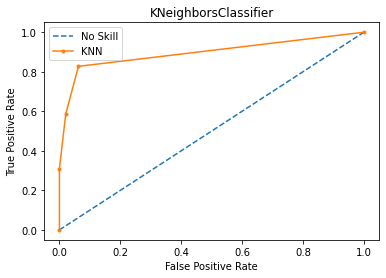

In [36]:
knn_auc = metrics.roc_auc_score(Y_test, y_pred_proba_knn)
knn_fpr, knn_tpr, _ = metrics.roc_curve(Y_test, y_pred_proba_knn)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.title('KNeighborsClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## For Logistic Regression Model

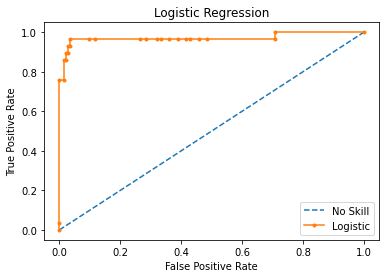

In [37]:
lr_auc = metrics.roc_auc_score(Y_test, y_pred_proba_LR)
lr_fpr, lr_tpr, _ = metrics.roc_curve(Y_test, y_pred_proba_LR)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.title('Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## For Naive Bayes Model

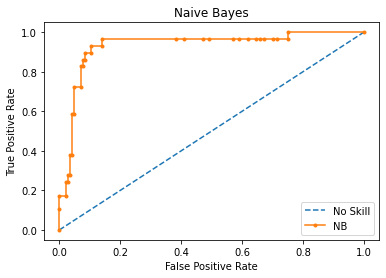

In [38]:
NB_auc = metrics.roc_auc_score(Y_test, y_pred_proba_NB)
NB_fpr, NB_tpr, _ = metrics.roc_curve(Y_test, y_pred_proba_NB)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(NB_fpr, NB_tpr, marker='.', label='NB')
plt.title('Naive Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## For SVM model

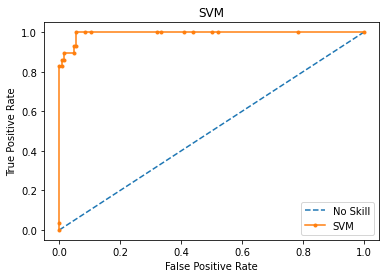

In [39]:
svm_auc = metrics.roc_auc_score(Y_test, y_pred_proba_SVM)
svm_fpr, svm_tpr, _ = metrics.roc_curve(Y_test, y_pred_proba_SVM)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.title('SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## For Decision Tree model

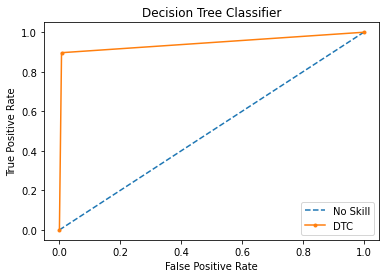

In [40]:
Dtc_auc = metrics.roc_auc_score(Y_test, y_pred_proba_Dtc)
Dtc_fpr, Dtc_tpr, _ = metrics.roc_curve(Y_test, y_pred_proba_Dtc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(Dtc_fpr, Dtc_tpr, marker='.', label='DTC')
plt.title('Decision Tree Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Roc-Auc Score for each model

In [41]:
# summarize scores for knn
print('KNN: ROC AUC=%.3f' % (knn_auc))
# summarize scores for logreg
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# summarize scores for Naive Bayes
print('Naive Bayes: ROC AUC=%.3f' % (NB_auc))
# summarize scores for logreg
print('SVM: ROC AUC=%.3f' % (svm_auc))
# summarize scores for DTC
print('DTC: ROC AUC=%.3f' % (Dtc_auc))

KNN: ROC AUC=0.895
Logistic: ROC AUC=0.971
Naive Bayes: ROC AUC=0.932
SVM: ROC AUC=0.994
DTC: ROC AUC=0.945


# Comparison Between Classifiers Used

In [42]:
print("                   KNN Model\n")
print(metrics.classification_report(Y_test, yhat_KNN))

                   KNN Model

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       144
           1       0.85      0.59      0.69        29

    accuracy                           0.91       173
   macro avg       0.89      0.78      0.82       173
weighted avg       0.91      0.91      0.91       173



In [43]:
print("                   Logistic Regression Model\n")
print(metrics.classification_report(Y_test, yhat_LR))

                   Logistic Regression Model

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       144
           1       1.00      0.59      0.74        29

    accuracy                           0.93       173
   macro avg       0.96      0.79      0.85       173
weighted avg       0.94      0.93      0.92       173



In [44]:
print("                   Naive Bayes Model\n")
print(metrics.classification_report(Y_test, yhat_NB))

                   Naive Bayes Model

              precision    recall  f1-score   support

           0       1.00      0.24      0.38       144
           1       0.21      1.00      0.35        29

    accuracy                           0.36       173
   macro avg       0.60      0.62      0.36       173
weighted avg       0.87      0.36      0.38       173



In [45]:
print("                   SVM Model\n")
print(metrics.classification_report(Y_test, yhat_SVM))

                   SVM Model

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       144
           1       1.00      0.76      0.86        29

    accuracy                           0.96       173
   macro avg       0.98      0.88      0.92       173
weighted avg       0.96      0.96      0.96       173



In [46]:
print("                   Decision Tree Classifier Model\n")
target_names = ['Live(0)', 'Die(1)']
print(metrics.classification_report(Y_test, yhat_Dtc,  target_names=target_names))

                   Decision Tree Classifier Model

              precision    recall  f1-score   support

     Live(0)       0.98      0.99      0.99       144
      Die(1)       0.96      0.90      0.93        29

    accuracy                           0.98       173
   macro avg       0.97      0.94      0.96       173
weighted avg       0.98      0.98      0.98       173



## Decision Tree Visualization

In [47]:
from sklearn.tree import export_graphviz
feature_cols = ["location", "country" , "gender" , "age","vis_wuhan","from_wuhan", "symptom1" , "symptom2" , "symptom3", \
                "symptom4" , "symptom5" ,"symptom6", "diff_sym_hos"]

export_graphviz(Dtc, out_file='tree_entropy.dot', feature_names = feature_cols,\
                class_names = ["Live(0)", "Die(1)"],\
                rounded = True, proportion = False, precision = 2, filled = True)
!dot -Tpng tree_entropy.dot -o tree_entropy.png -Gdpi=600
from IPython.display import Image
Image(filename = 'tree_entropy.png')